<h1><center><b> Data Visualization: Waffle Charts, Word Clouds, Regression Plots (Seaborn) </h1></center></b>

In [73]:
import matplotlib.pyplot as mpl
import matplotlib.patches as mpatches #For waffle Charts
import pandas as pd
import numpy as np
%matplotlib inline

In [74]:
#Dataset from https://www.kaggle.com/datasets/ammaraahmad/immigration-to-canada?resource=download
df_canada=pd.read_csv('canadian_immegration_data.csv')
#Make 'country index column'
df_canada.set_index('Country',inplace = True)

df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## **Waffle Charts**
Display progress towards goals or show how parts contribute to a whole

In [75]:
df_scan=df_canada.loc[['Denmark', 'Sweden', 'Norway'], :] #Get all columns for the scandanavian countries
df_scan

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327


In [76]:
#Compute the proportion of each category with respect to the total
total_values = df_scan['Total'].sum() #3901+5866+2327=12094
cat_proportions = df_scan['Total'] / total_values #Column will have each Total columns value/ 12094 
#Make new dataframe for proportion valuesb
pd.DataFrame({"Category Proportion": cat_proportions})

,Category Proportion
Country,
Denmark,0.322557
Sweden,0.485034
Norway,0.192409


In [77]:
#Define waffle chart size 
width = 40 
height = 10 

total_num_tiles = width * height #Total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


In [78]:
#Determine each proportions number of tiles

#Compute the number of tiles for each category proportion
tiles_per_cat = (cat_proportions * total_num_tiles).round().astype(int)

#Create data frame
pd.DataFrame({"Number of tiles": tiles_per_cat})

,Number of tiles
Country,
Denmark,129
Sweden,194
Norway,77


This means that Denmark will occupy 129 tiles, Sweden will have 194 tiles and Norway has 77 tiles out of 400 tiles.

In [79]:
#!pip install pywaffle
from pywaffle import Waffle

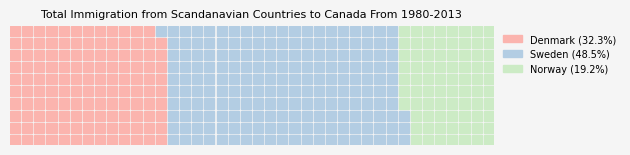

In [80]:
# Waffle chart
values={'Denmark': 129, 'Sweden':194, 'Norway':77}
mpl.figure(
    FigureClass = Waffle,
    rows = 10,
    values = values,
    cmap_name = 'Pastel1',
    facecolor = 'whitesmoke', #Background color
    title = {"label": "Total Immigration from Scandanavian Countries to Canada From 1980-2013", "loc": "center", "size": 8},
    labels = ['Denmark (32.3%)', 'Sweden (48.5%)', 'Norway (19.2%)'], #labels for legend
    legend = {'loc': 'upper left', 
              'bbox_to_anchor': (1, 1),
              'framealpha': 0, #No frame
              'fontsize': 7})
    
# plt.show() 


mpl.show()

## **Word Clouds**
The more a specific word appears, the larger and bolder it is in the word cloud

In [81]:
!pip install wordcloud

In [108]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import urllib

In [89]:
text = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [90]:
#Remove redundant stopwords
stopwords = set(STOPWORDS)

In [94]:
#Make a word cloud object
alice_wc = WordCloud(
     background_color='white',
     max_words=2000,
     stopwords=stopwords,
     collocations=False) #Remove duplicate words in wordcloud

#Generate the word cloud
alice_wc.generate(text)

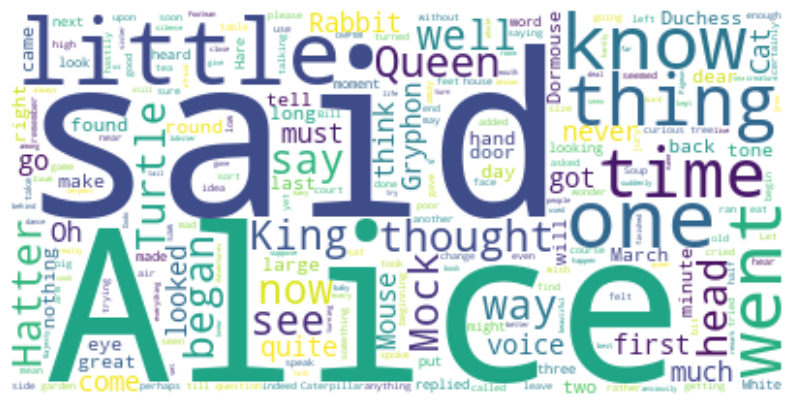

In [98]:
#Display the word cloud
fig = mpl.figure(figsize=(10, 9))

mpl.imshow(alice_wc, interpolation='bilinear')
mpl.axis('off')
mpl.show()

In the first 2000 words of the novel, the most frequently used words are 'Alice, 'said' and 'little. 

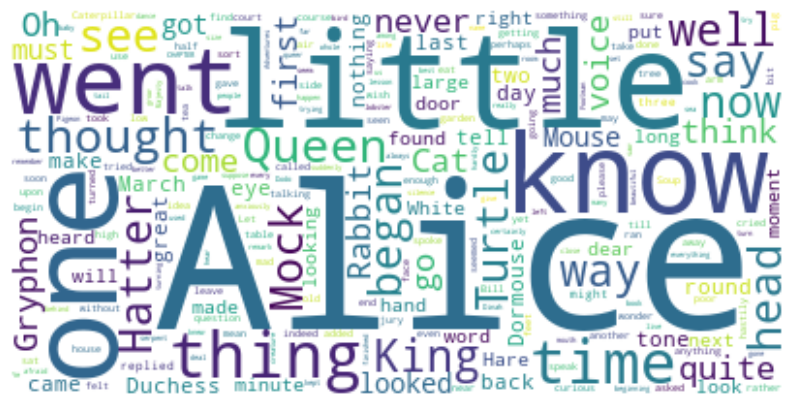

In [99]:
#Add 'said' to list of stopwords
stopwords.add('said') 

#Re-generate the word cloud
alice_wc.generate(text)

#Display the cloud
fig = mpl.figure(figsize=(10, 9))

mpl.imshow(alice_wc, interpolation='bilinear')
mpl.axis('off')
mpl.show()

In [111]:
#Superimpose the words onto a mask in the shape of Alice and the rabbit
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

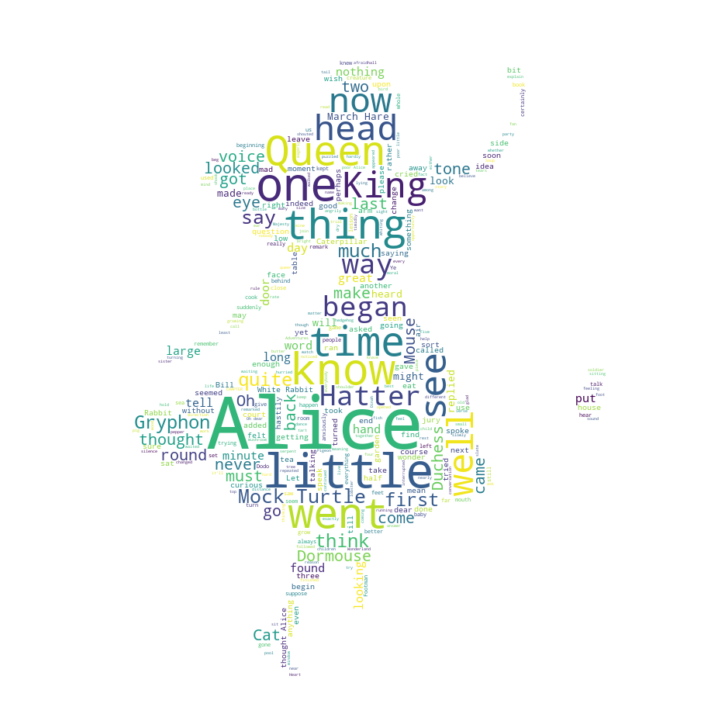

In [115]:
#Create a new word cloud object
alice_wc1 = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

#Generate the word cloud
alice_wc1.generate(text)

#Display the word cloud
fig1 = mpl.figure(figsize=(9, 10))

mpl.imshow(alice_wc1, interpolation='bilinear')
mpl.axis('off')
mpl.savefig('alice_wine.png')
mpl.show()

**Create a wordcloud using the Canada immigration dataset**

In [116]:
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [119]:
#What was total immigration?
total_immigration=df_canada['Total'].sum()
print('The total immigration to Canada from 1980-2013 is:', total_immigration)

The total immigration to Canada from 1980-2013 is: 6409153


In [122]:
#Duplicate each country's name based on how much they contribute to the total immigration
max_words = 100
word_string = ''
for country in df_canada.index.values:
     #check if country's name is a single-word name
     if country.count(" ") == 0:
         repeat_num_times = int(df_canada.loc[country, 'Total'] / total_immigration * max_words)
         word_string = word_string + ((country + ' ') * repeat_num_times)


word_string

'Algeria Bangladesh China China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India India Iraq Israel Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Poland Portugal Romania '

In [125]:
canada_mask=np.array(Image.open('canada_mask.png'))
canada_mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

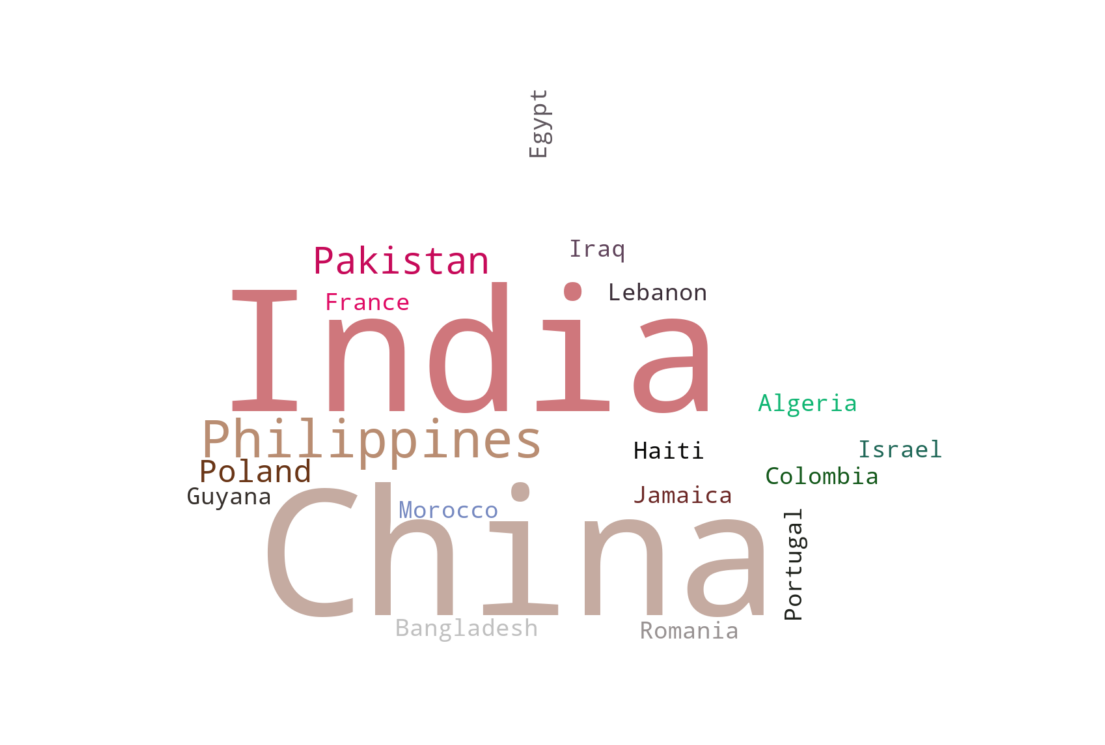

In [128]:
#Create the word cloud
wordcloud = WordCloud(background_color='white', mask=canada_mask, collocations=False).generate(word_string)

#Display the wordcloud
image_colors = ImageColorGenerator(canada_mask) 
mpl.figure(figsize=(14, 18))

mpl.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
mpl.axis('off')
mpl.show()

## **Regression Plots**

In [129]:
import seaborn as sns

**Create a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013**

In [138]:
years= list(map(str,range(1980,2014)))
df_total=pd.DataFrame(df_canada[years].sum(axis=0))
df_total.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [139]:
#Change years to float type (for regression!)
df_total.index = map(float, df_total.index)

#Reset the index to put in back in as a column in the dataframe
df_total.reset_index(inplace=True)

#Rename columns
df_total.columns = ['Year', 'Total']

df_total.head()

,Year,Total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

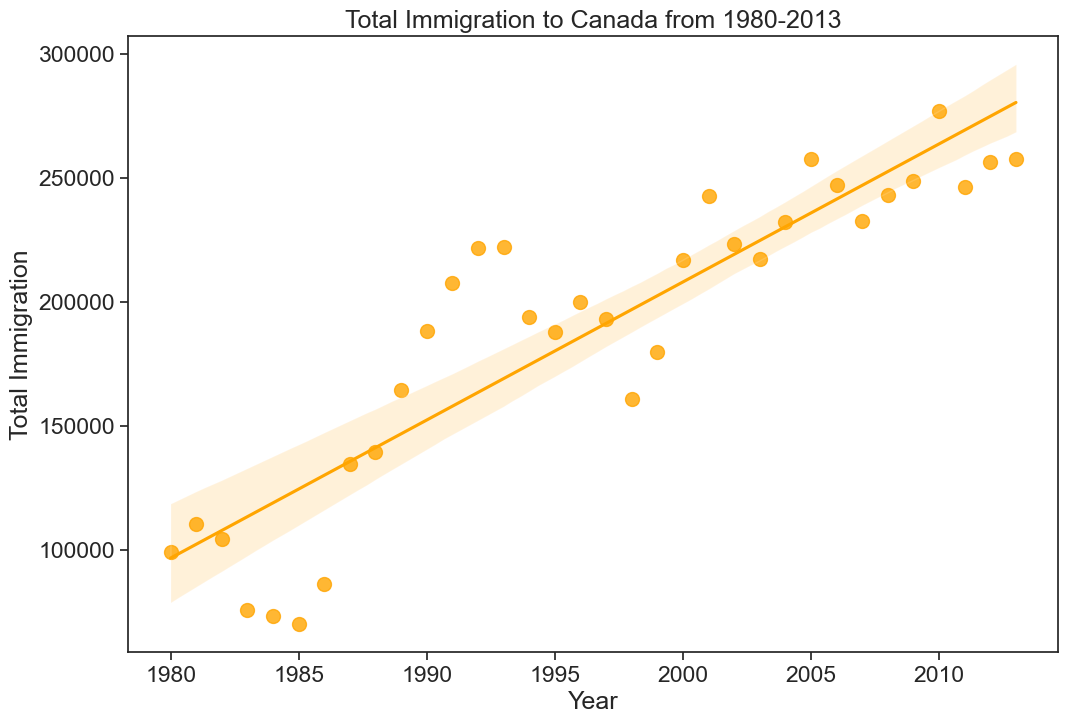

In [155]:
#Create a regression plot
mpl.figure(figsize=(12,8))

sns.set(font_scale=1.5) #Change font size
sns.set_style('ticks') #Change to white background

ax=sns.regplot(x='Year', y='Total', data=df_total, color='orange', scatter_kws={'s': 100}) #scatter_kws is size of data markers
ax.set(xlabel='Year', ylabel='Total Immigration') 
ax.set_title('Total Immigration to Canada from 1980-2013') 

**Create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.**

In [163]:
df_scan_total= pd.DataFrame(df_scan[years].sum(axis=0))
df_scan_total.head()

,0
1980,669
1981,678
1982,627
1983,333
1984,252


In [164]:
#Change years to float type (for regression!)
df_scan_total.index = map(float, df_scan_total.index)

#Reset the index to put in back in as a column in the dataframe
df_scan_total.reset_index(inplace=True)

#Rename columns
df_scan_total.columns = ['Year', 'Total']

df_scan_total.head()

,Year,Total
0,1980.0,669
1,1981.0,678
2,1982.0,627
3,1983.0,333
4,1984.0,252


Text(0.5, 1.0, 'Total Immigration from Scandanavian Countries to Canada from 1980-2013')

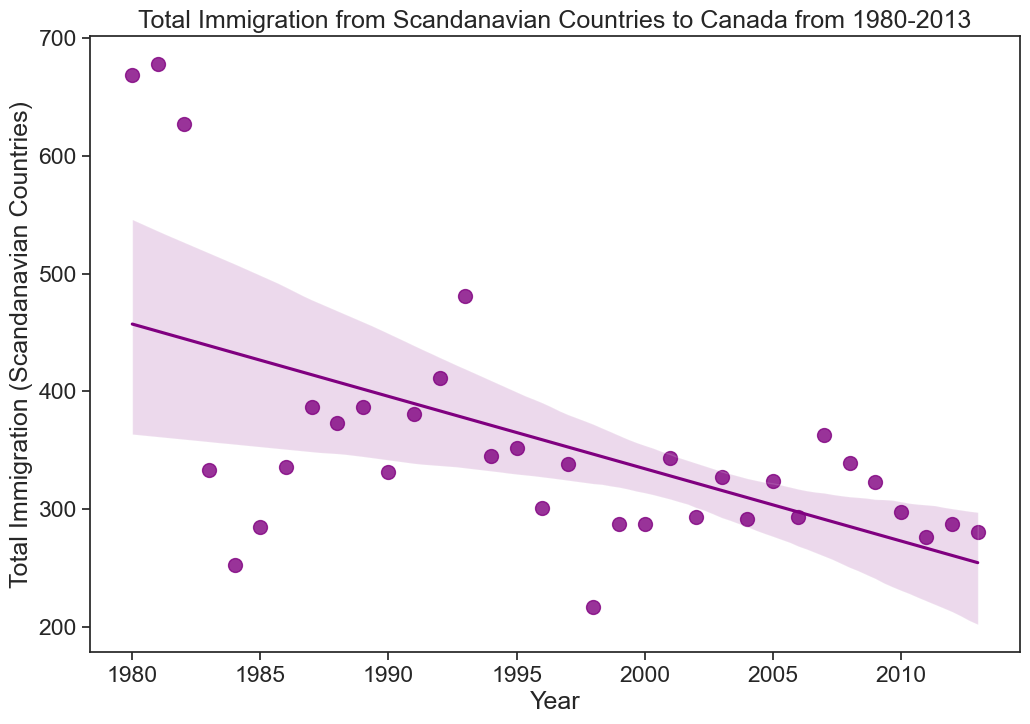

In [167]:
#Create a regression plot
mpl.figure(figsize=(12,8))

sns.set(font_scale=1.5) #Change font size
sns.set_style('ticks') #Change to white background

ax=sns.regplot(x='Year', y='Total', data=df_scan_total, color='purple', scatter_kws={'s': 100}) #scatter_kws is size of data markers
ax.set(xlabel='Year', ylabel='Total Immigration (Scandanavian Countries)') 
ax.set_title('Total Immigration from Scandanavian Countries to Canada from 1980-2013') 

## **Resources**
https://python-charts.com/part-whole/waffle-chart-matplotlib/#:~:text=A%20waffle%20chart%20is%20an,pyplot

https://www.the-analytics.club/word-cloud-python-example

https://www.datacamp.com/tutorial/wordcloud-python

This Notebook was created to take notes for the IBM Coursera Data Science Certificate (Week 3 (Advanced Visualization Tools; Data Visualization with Python Course). Credit for the IBM Skills Network Labs goes to Alex Aklson, Jay Rajasekharan, Ehsan M. Kermani, Slobodan Markovic, and Weiqing Wang.